# NYC Trees in West Village BID

This tutorial demonstrates how to analyze tree data within the West Village Business Improvement District (BID) using Python, GeoPandas, and spatial analysis techniques.


In [23]:
# Ensure `geopandas` is installed to handle geographic data operations.
# This library is essential for working with spatial data in this tutorial.
!pip install geopandas --quiet
!pip install matplotlib --quiet


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

# Import necessary libraries
# - `geopandas` for geographic data manipulation
# - `matplotlib.pyplot` for visualization
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:

# Load the trees dataset
# `trees_data` contains geographic locations of trees across NYC.
trees_data = gpd.read_file('./files/Forestry_Tree_Points.csv', encoding='utf-8')

# Load the Business Improvement Districts (BIDs) dataset
# `bid_data` includes geographic boundaries of BIDs across NYC.
bid_data = gpd.read_file('../common_files/NYC_BIDS_09112015.csv', encoding='utf-8')

In [3]:
# Convert the trees_data Location column from string to geometry format
trees_data['Location'] = gpd.GeoSeries.from_wkt(trees_data['Location'])

trees_data = gpd.GeoDataFrame(trees_data, geometry='Location')
trees_data

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
0,1045129,1,Full,Fair,0,98BE61F0-21C1-42C5-8B61-451D7D2F2249,POINT (-73.7970944304933170 40.7771343225013041),BE7E6F4A-4C65-440D-86C3-C9EF18482711,Malus - apple,2015-10-01 13:20:30.0000000,,,,,POINT (-73.79709 40.77713)
1,1372972,17,Full,Good,,0E83EC19-5714-4776-B7C5-65A222B45697,POINT (-73.7545598045751660 40.6746482832744931),906B2696-7FE4-4765-81DD-B5B6E4E5C2D9,Acer - maple,2015-10-29 14:04:00.0000000,,,,,POINT (-73.75456 40.67465)
2,1449291,2,Full,Fair,0,E613FB11-CC76-4461-9361-BA7C71662843,POINT (-73.7986140550362535 40.7213857265715546),2E424780-709E-4AE3-B1B4-C071A3673190,Malus - apple,2015-10-29 15:47:47.0000000,,,,,POINT (-73.79861 40.72139)
3,2263124,6,Full,Fair,0,B36837B6-A03F-45DC-BD4D-DB0BBEF8B2FC,POINT (-73.9150025865851177 40.8487445891240810),023BF968-1114-422B-BF60-646387AAD5C1,Acer - maple,2016-01-05 19:16:49.0000000,,,,,POINT (-73.915 40.84874)
4,2594581,4,Full,Good,0,9A37D3DF-AF98-4047-ADCC-8D0CDA568021,POINT (-74.1195598507131450 40.6136494687086511),AA1139D9-EEB3-427D-BF0A-9F6762CCB8C7,Malus - apple,2016-01-05 15:29:11.0000000,,,,,POINT (-74.11956 40.61365)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059290,15196914,3,Full,Excellent,,863C1716-18F2-44E9-BD4D-07FB4111084C,POINT (-73.9627038413468370 40.7152627304133219),7825C175-C3C4-4DCA-AC6C-2C8FCBD784AB,Tilia cordata 'Greenspire' - 'Greenspire' Litt...,2024-05-29 19:50:00.0000000,,2024-05-28 04:00:00.0000000,,,POINT (-73.9627 40.71526)
1059291,15369996,13,Full,Good,,E23B2D8E-1676-4E2D-9D54-365E8DB37B04,POINT (-73.8763938785616858 40.7579641129244905),D3B8B600-17C3-4BB3-AC8C-74F15B82BB27,Acer platanoides - Norway maple,2024-07-15 13:29:04.0000000,2024-07-15 13:29:53.0000000,,7,2024-07-15 13:29:53.0000000,POINT (-73.87639 40.75796)
1059292,15375536,5,Shaft,Dead,,935959DF-1131-4FAE-8060-2D45F35DE11A,POINT (-74.1089672383464091 40.5699080596199835),BFE4938C-330E-4D4C-8484-6A8ACE565F75,Thuja occidentalis - arborvitae,2024-07-16 15:18:38.0000000,2024-07-16 15:20:00.0000000,,,,POINT (-74.10897 40.56991)
1059293,15154009,3,Full,Excellent,,7D432489-2468-473E-914C-386F84FCE640,POINT (-73.9881528822799481 40.5927302132450336),B68D1FA9-932A-4C35-8346-51B74B157794,Ulmus propinqua 'Emerald Sunshine' - 'Emerald ...,2024-05-16 18:30:00.0000000,,2024-05-13 04:00:00.0000000,,,POINT (-73.98815 40.59273)


In [6]:

# Filter `bid_data` to include only the BID with West Village Partnership
# This BID will be our primary area of analysis.
wv_data = bid_data[bid_data['F_ALL_BI_2'] == "West Village"]

# Convert BID geometry from WKT strings to proper geometry format for geospatial analysis
wv_data['the_geom'] = gpd.GeoSeries.from_wkt(wv_data['the_geom'])
wv_data = gpd.GeoDataFrame(wv_data, geometry='the_geom')

# Use `explode` to ensure each geometry component is in a separate row, simplifying spatial analysis
exploded_wv_data = wv_data.explode()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19640\218392500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wv_data['the_geom'] = gpd.GeoSeries.from_wkt(wv_data['the_geom'])


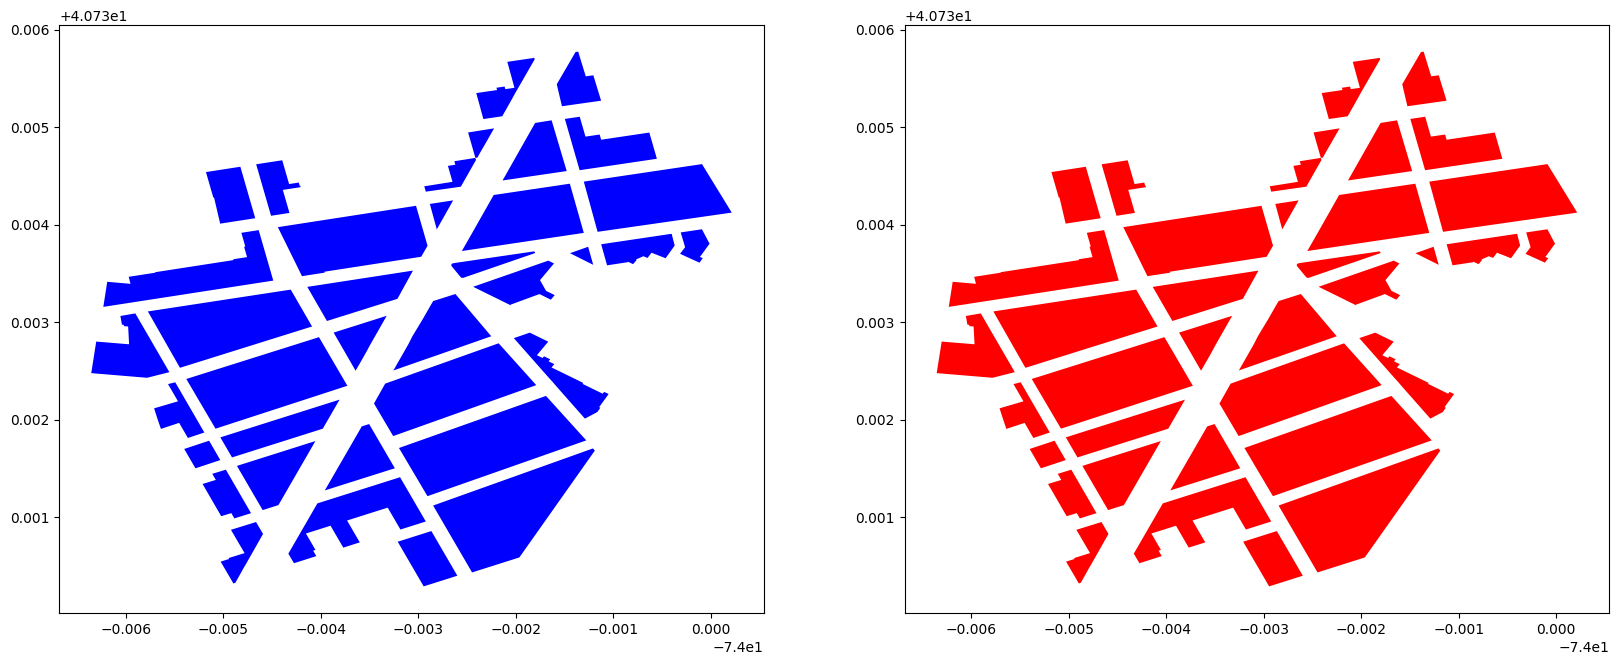

In [7]:
# plot the two datasets side by side
fig, ax = plt.subplots(1, 2,  figsize=(20, 10))

# plot the bid_data_objectid_2_0 geodataframe
wv_data.plot(ax=ax[0], color='blue', markersize=.01)
# plot the exploded geodataframe
exploded_wv_data.plot(ax=ax[1], color='red', markersize=.01)

plt.show()

In [8]:
# Get the bounding box of all exploded_lic_data geometry
bounding_box = exploded_wv_data.total_bounds

# Filter trees_data to include only trees within the bounding box
trees_within_bbox = trees_data.cx[bounding_box[0]                                  :bounding_box[2], bounding_box[1]:bounding_box[3]]

# Convert the filtered data to a GeoDataFrame
trees_within_bbox = gpd.GeoDataFrame(trees_within_bbox, geometry='Location')

# how many trees are within the bounding box
print("Number of trees within the bounding box: ", trees_within_bbox.shape[0])

Number of trees within the bounding box:  1056


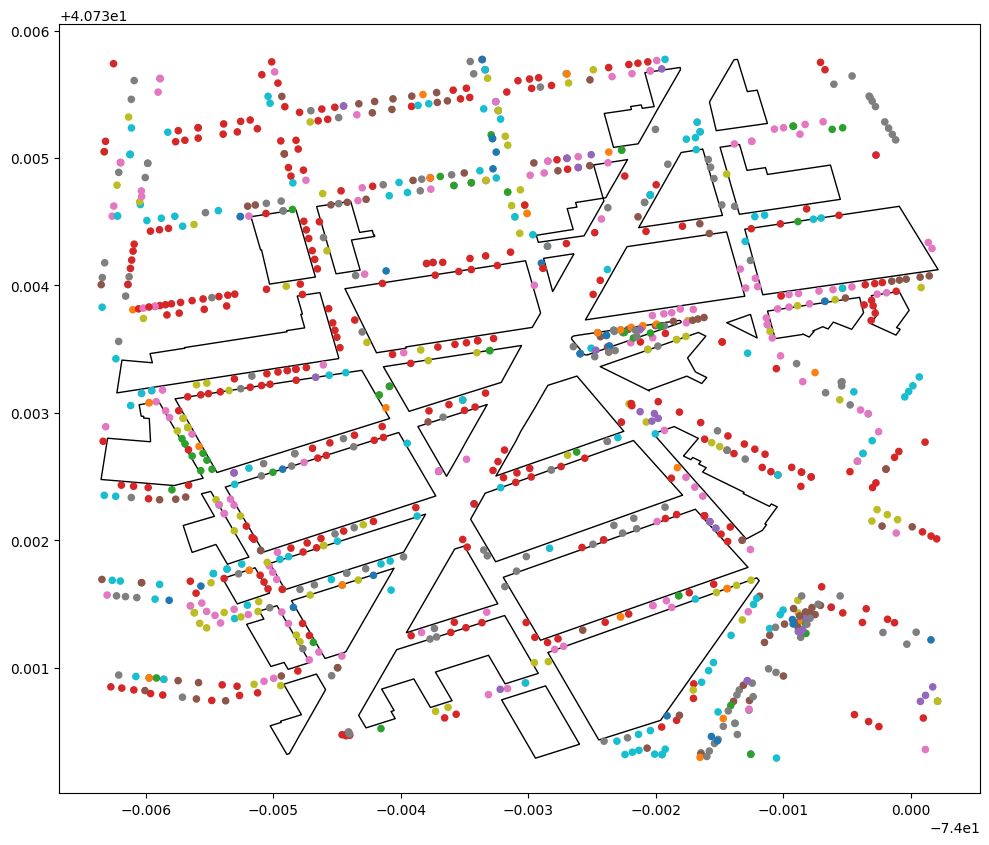

In [9]:
# Create a figure and axes with the desired size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot exploded_58 on the axes
exploded_wv_data.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Plot trees_within_bbox on the same axes
trees_within_bbox.plot(ax=ax, column='GenusSpecies', markersize=20)

# Optionally, you can adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [10]:
# add a color column to trees_within_bbox that gives a unique hex color to each GenusSpecies
trees_within_bbox['color'] = trees_within_bbox['GenusSpecies'].apply(
    lambda x: hash(x) % 16777215)

# print the first 5 rows of the trees_within_bbox dataframe
trees_within_bbox.head()

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location,color
333,203997,15,Retired,Unknown,13,70142778-C1FE-44F4-90D4-54E21E6A6ACD,POINT (-74.0033970624707536 40.7335661034980276),11398E30-CEAC-4AD6-BC88-D2D26C9EC0FB,Gleditsia triacanthos var. inermis - Thornless...,2015-05-31 14:34:00.0000000,2016-10-06 18:56:04.0000000,,,,POINT (-74.0034 40.73357),9636857
652,164939,1,Retired,Unknown,,B27C04D7-6322-4041-AD69-8123F03167DD,POINT (-74.0016747338214174 40.7352807450394536),107A2358-0C56-4A83-A0B5-5BA341E9188B,Pyrus calleryana - Callery pear,2015-04-26 17:29:00.0000000,2018-03-21 14:16:00.0000000,,,,POINT (-74.00167 40.73528),5088126
1343,204008,17,Full,Fair,,B6CE7F1D-9BB0-47A6-B5EE-C7B60D734851,POINT (-74.0015468482669689 40.7310404984484151),9946E329-51CB-417E-8CED-069C8EE3F581,Ulmus americana - American elm,2015-06-01 14:30:00.0000000,2024-07-31 11:52:15.0000000,,7,2024-07-31 11:52:15.0000000,POINT (-74.00155 40.73104),11472717
2308,157332,12,Retired,Poor,,347B2F81-C6B8-42EF-A4BA-AE076BBD6F49,POINT (-74.0060349220559317 40.7316670800215164),247644CE-0C59-4674-8498-86FAA8F504EC,Platanus x acerifolia - London planetree,2015-04-20 13:28:00.0000000,2024-01-19 15:57:00.0000000,,6,2023-03-24 13:40:00.0000000,POINT (-74.00603 40.73167),404424
3155,203996,10,Retired,Unknown,,B16C6453-4B8E-4FDA-B1D6-1A6ADAF8C8E1,POINT (-74.0058610245060748 40.7309094222846326),21D71805-EA52-4A69-973D-AC48D76865E1,Pyrus calleryana - Callery pear,2015-05-31 13:45:00.0000000,2016-10-06 15:30:45.0000000,,,,POINT (-74.00586 40.73091),5088126


In [11]:

# save trees_within_bbox as  a json file
trees_within_bbox.to_file("./files/trees_within_bbox.json", driver='GeoJSON')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [12]:
exploded_wv_data.to_file("./files/exploded_wv_data.json", driver='GeoJSON')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
